# CLUSTERING----Clustering is the process of grouping similar data points in a dataset into groups.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("cars.xls")
    

### EDA

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.sample()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
390,18957.890043,5936,Chevrolet,Malibu,LS MAXX Hback 4D,Hatchback,6,3.5,4,0,1,1


In [3]:
x = df[["Price", "Mileage", "Cylinder"]]

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [5]:
model = KMeans(n_clusters=4)
model.fit(x)

KMeans(n_clusters=4)

In [6]:
predictions = model.predict(x)

In [10]:
predictions

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [7]:
x["cluster"] = predictions
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [8]:
x["cluster"].value_counts()

cluster
0    387
2    190
1    160
3     67
Name: count, dtype: int64

In [13]:
x[x["cluster"]==0]

,Price,Mileage,Cylinder,cluster
32,23016.008009,18147,6,0
62,23420.706948,18910,6,0
63,22661.048485,20105,6,0
64,23493.082295,20453,6,0
67,23077.565910,23798,6,0
...,...,...,...,...
738,27788.813239,26786,4,0
739,26012.374625,34269,4,0
741,25959.122030,17431,4,0
742,23274.480711,21616,4,0


In [9]:
silhouette_score(x, predictions)

0.413689848316071

In [15]:
import matplotlib.pyplot as plt

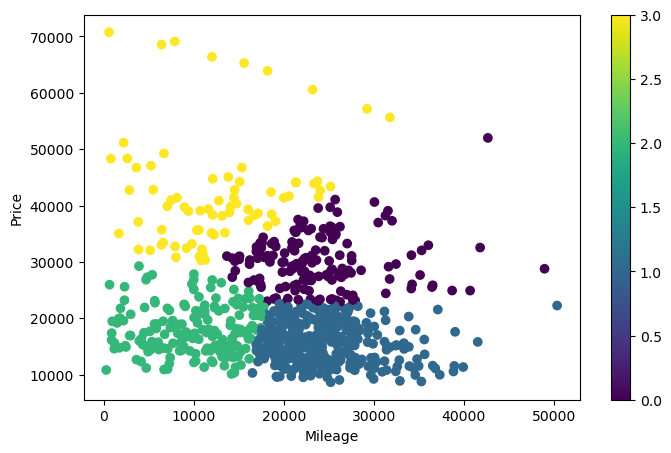

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(x.Mileage, x.Price, c=predictions)
plt.colorbar()
plt.xlabel("Mileage")
plt.ylabel("Price");

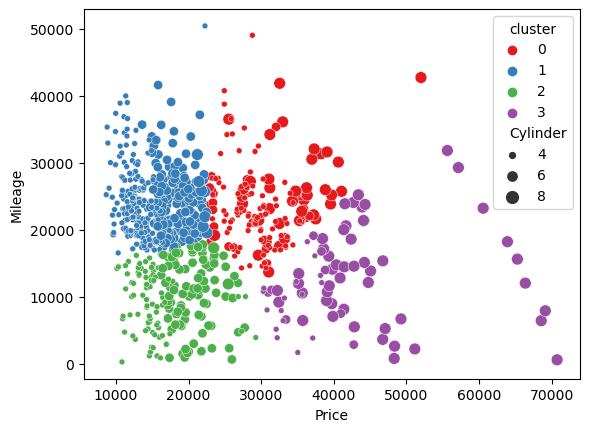

In [17]:
sns.scatterplot(x=x['Price'], y=x['Mileage'], hue=x['cluster'], size=x['Cylinder'], palette='Set1');

In [10]:
wcss = [] #within cluster sum of squares
ss = []
for i in range(2, 11):
    model = KMeans(i)
    model = model.fit(x)
    predictions = model.predict(x)
    ss1 = silhouette_score(x, predictions)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.45150701481198874
0.4126449714678833
0.4140718615829361
0.354774738615563
0.3280831965950648
0.362351081540202
0.3708784577354513
0.34532024057103267
0.35102790029524567


Text(0, 0.5, 'WCSS')

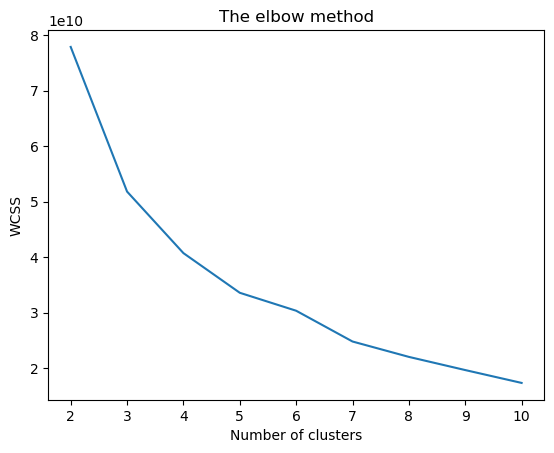

In [15]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

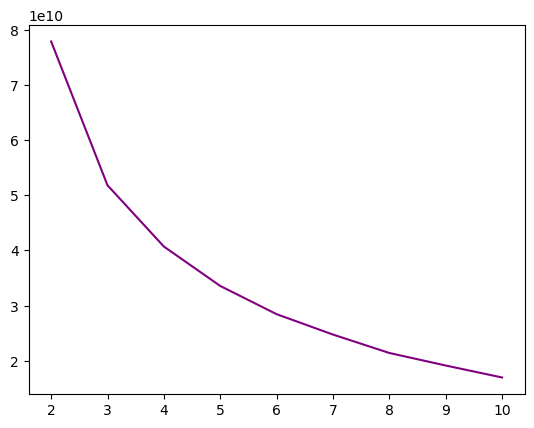

In [22]:
sns.lineplot(x=range(2, 11), y=wcss, markers="*", color="purple");

In [24]:
#pip install yellowbrick

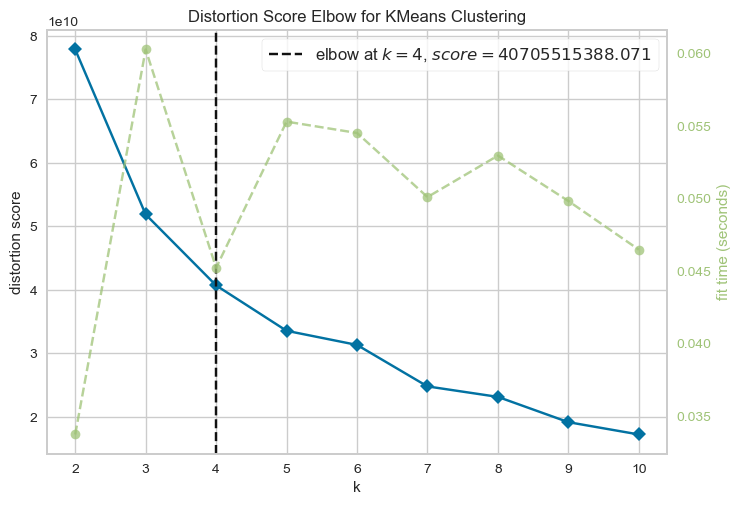

In [16]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
vis = KElbowVisualizer(km, k=10)
vis.fit(x)
vis.show();

In [26]:
# Hierarchical Clustering

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram


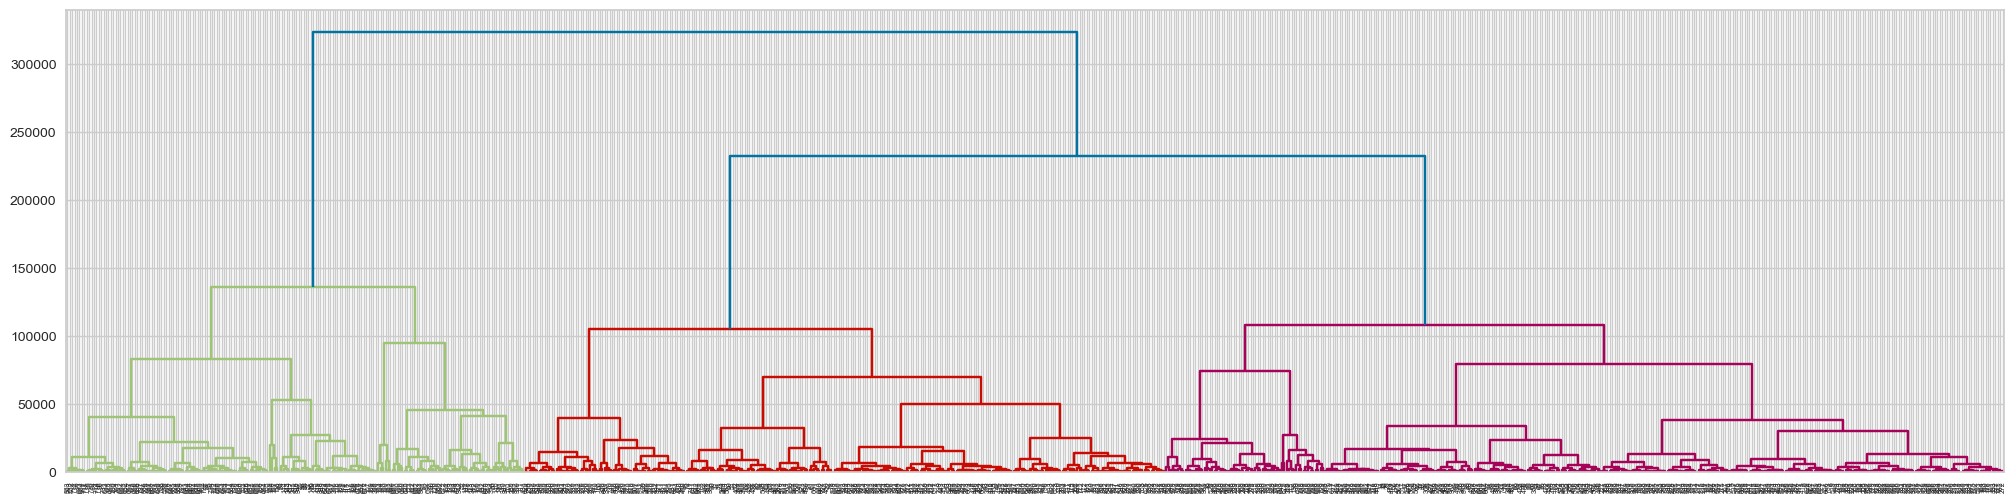

In [18]:
data = linkage(x, method="ward", metric="euclidean")

plt.figure(figsize=(25, 6))
dendrogram(data);


In [19]:
df = pd.read_csv("Billionaires.csv")
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


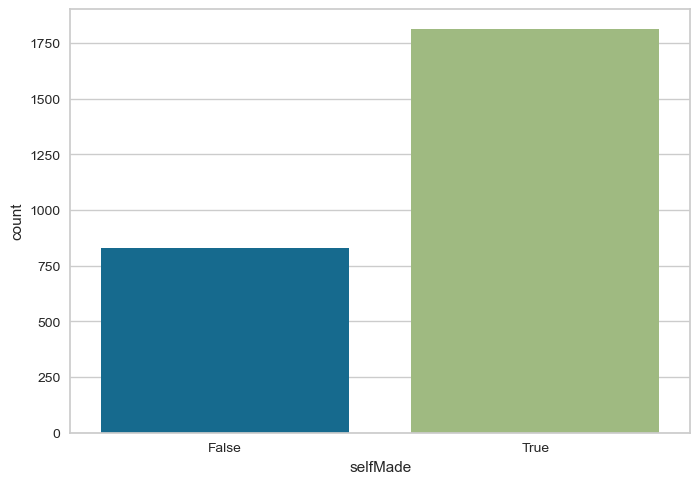

In [32]:
sns.countplot(x=df["selfMade"]);

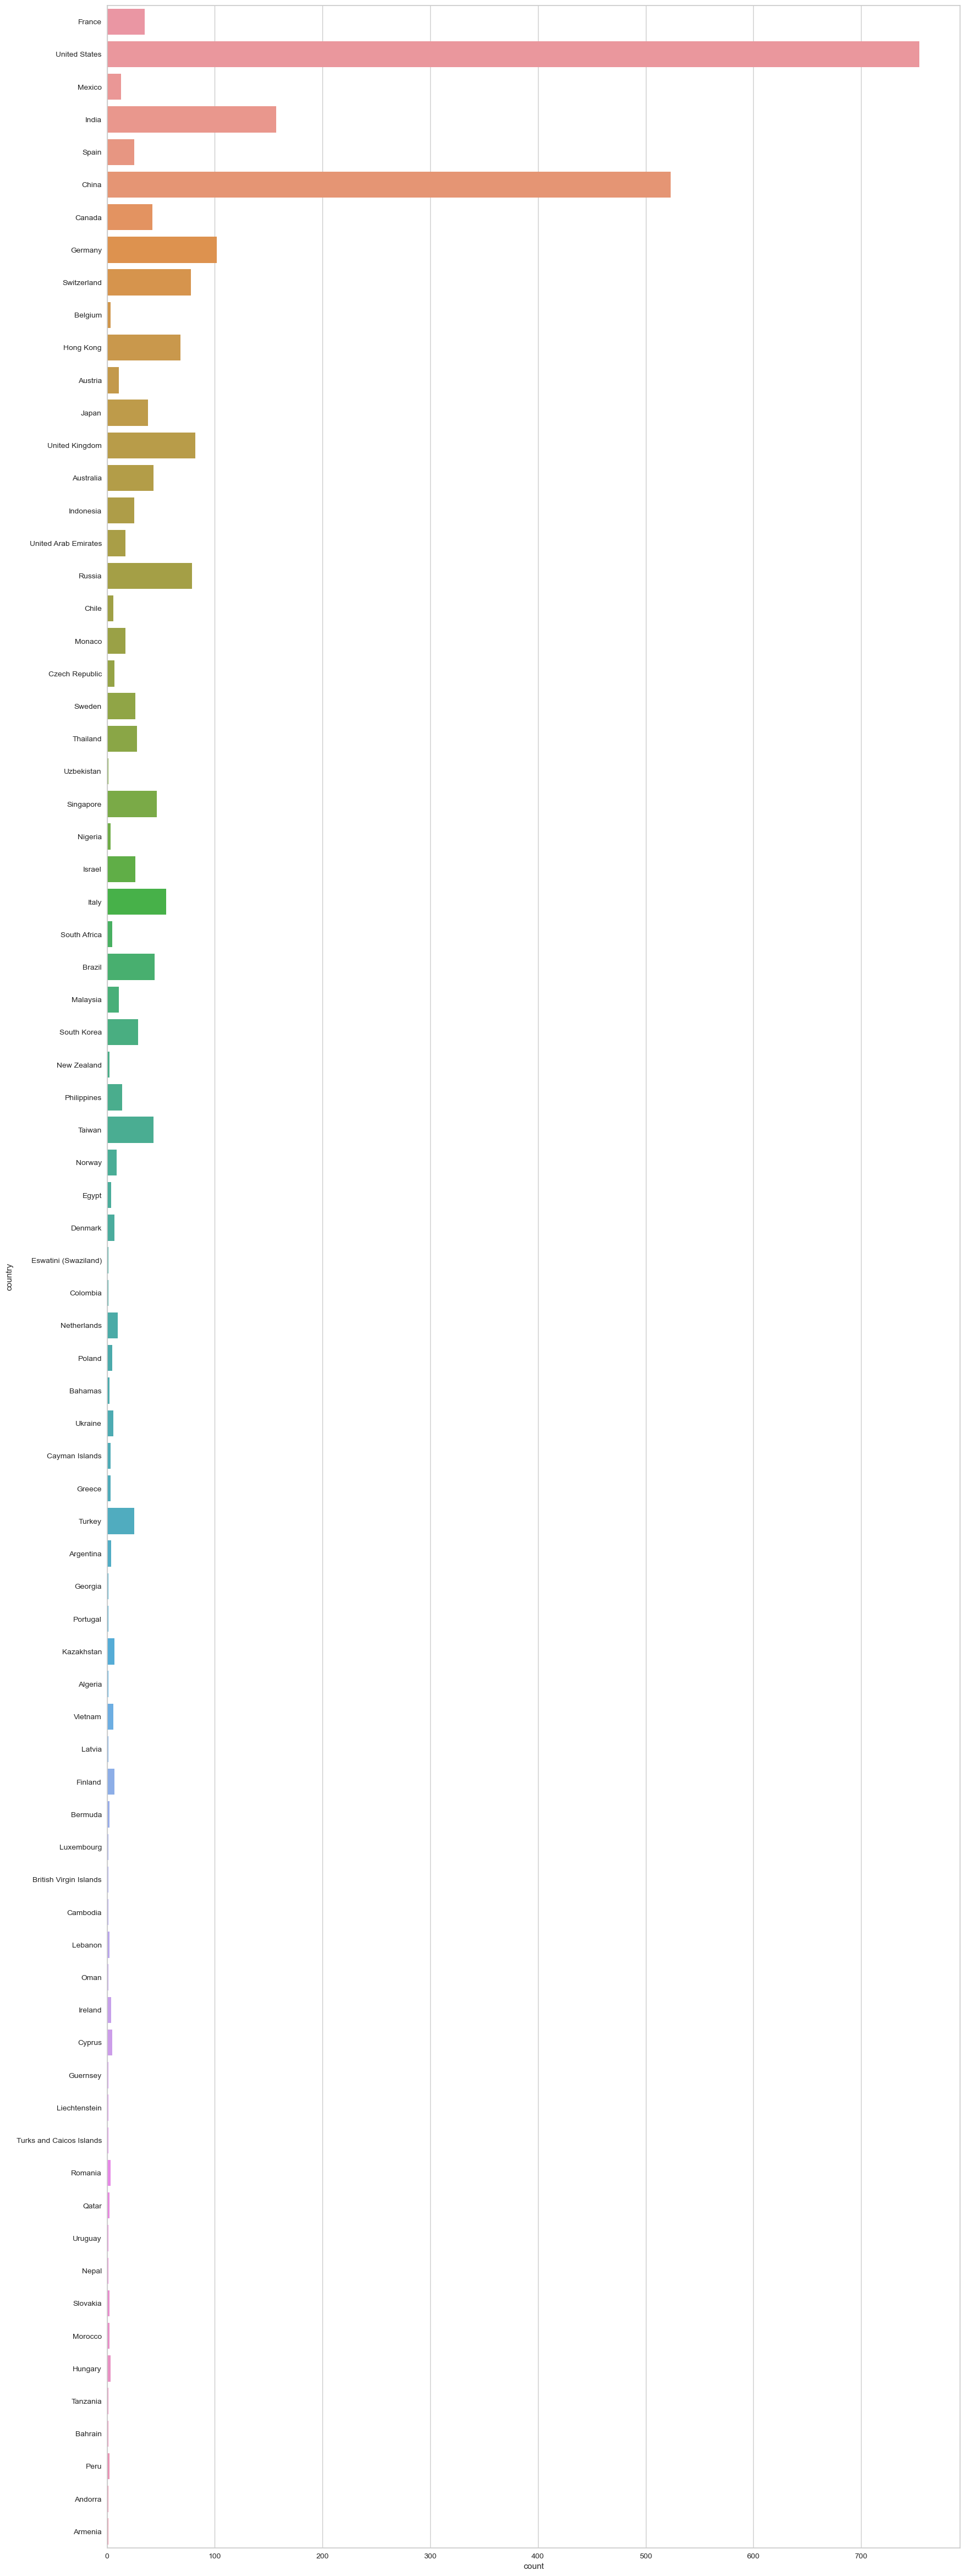

In [34]:
plt.figure(figsize=(20,60))
sns.countplot(y = df["country"]);

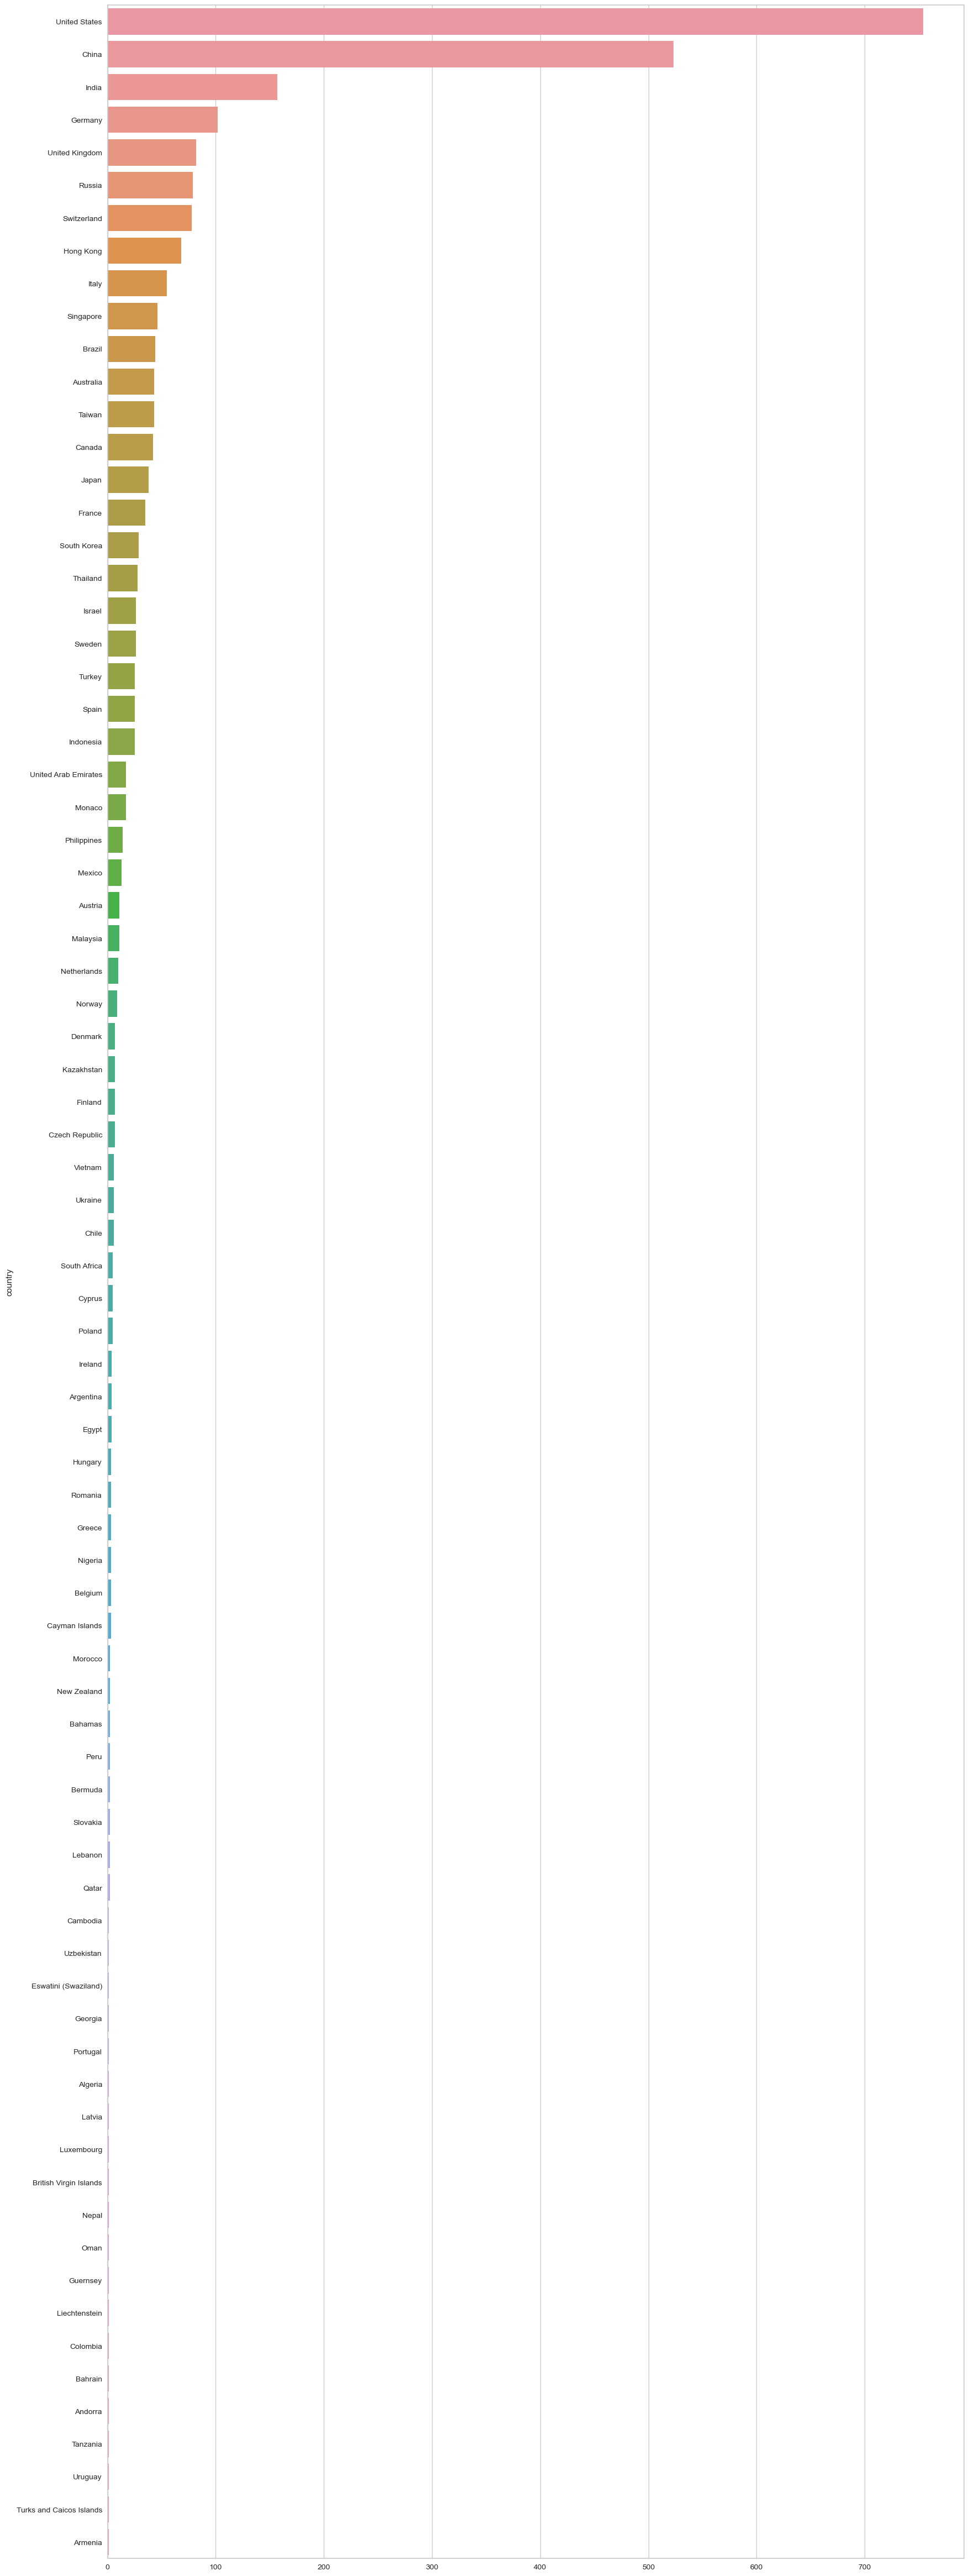

In [56]:
ndf = df["country"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 60))
# Since ndf is a Series with country names as the index and counts as the values,
# you don't need to specify ndf["country"] in sns.countplot.
# Instead, you directly use sns.barplot to plot the counts since sns.countplot is used to count occurrences.
sns.barplot(y=ndf.index, x=ndf.values)
plt.show()

In [52]:
df[df["country"] == "Turkey"]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
498,497,5300,Manufacturing,Ibrahim Erdemoglu,60.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
548,534,5000,Food & Beverage,Murat Ulker,64.0,Turkey,Istanbul,Food,Food & Beverage,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
582,580,4700,Manufacturing,Ali Erdemoglu,63.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
982,982,3000,Diversified,Semahat Sevim Arsel,94.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1042,1027,2900,Diversified,Ipek Kirac,38.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1128,1104,2700,Diversified,Mustafa Rahmi Koc,92.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1242,1217,2500,Energy,Saban Cemil Kazanci,62.0,Turkey,Istanbul,Energy,Energy,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1256,1217,2500,Diversified,Ferit Faik Sahenk,59.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1326,1312,2300,Construction & Engineering,Erman Ilicak,55.0,Turkey,Ankara,Construction,Construction & Engineering,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1349,1312,2300,Diversified,Filiz Sahenk,56.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322


In [53]:
tr = df[df["country"] == "Turkey"]

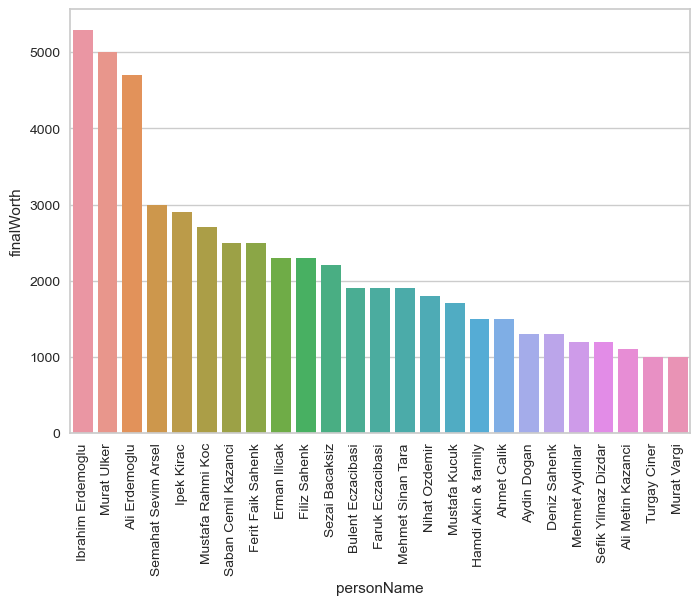

In [55]:
sns.barplot(x=tr["personName"], y=tr["finalWorth"]);
plt.xticks(rotation=90);

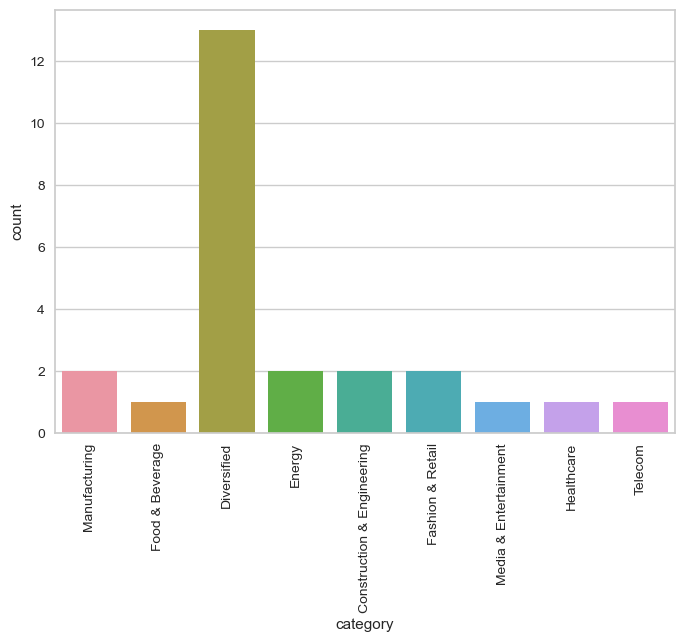

In [58]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show()

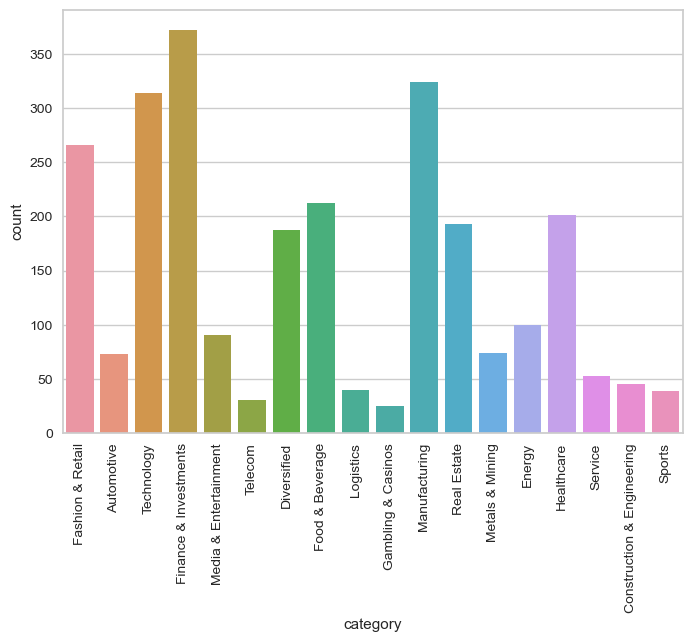

In [59]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

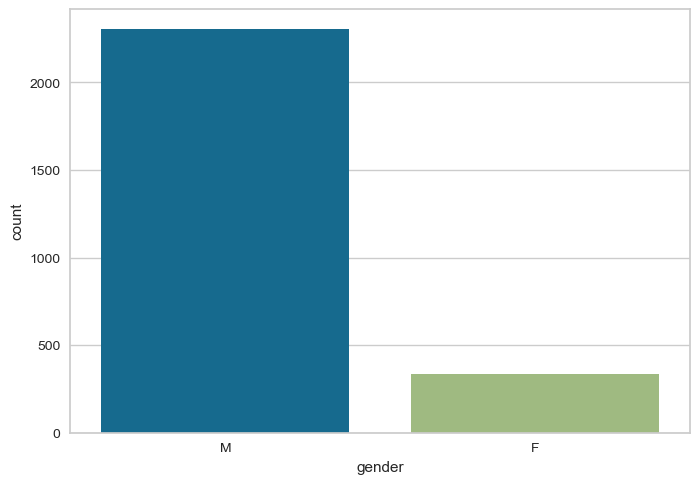

In [61]:
sns.countplot(x=df['gender']);

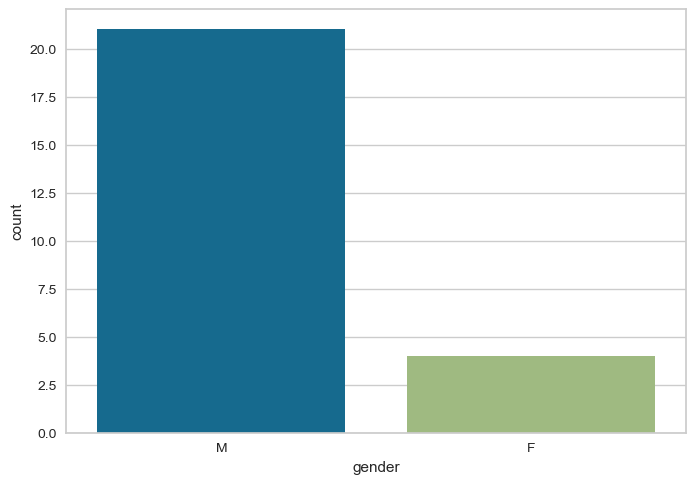

In [62]:
sns.countplot(x=tr['gender']);